# Assessment 1: Regression Analysis 







# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor"></a>
In the modern wine industry, the quality of the product is the paramount factor which determines the success in the market and brand reputation. The existing quality certification practices rely on the application of physicochemical tests and supplemented by sensory tests that are carried out by human experts (Nebot et al., 2015). This traditional approach creates a significant business problem as it fully relies on subjective human taste and the process is also expensive. Moreover, these tests occur at the end of the production cycle when a huge portion of time and money have already been invested. This late quality assessment makes the discovery of a poor-quality batch particularly costly  as the entire production process may need to be repeated. <br>

This project directly addresses the inefficiency and financial risk of this reactive quality control model. The objective of the project is to design a predictive analytics model based on the machine learning (ML) techniques using the well-known <a href="https://archive.ics.uci.edu/dataset/186/wine+quality">Wine Quality</a> dataset from the UCI Machine Learning Repository to estimate the quality of wine(ranging from 0 to 10) based on its objective physicochemical characteristics. Such a model will help solve the business problem by transforming quality assessment from a subjective, lagging indicator into an objective, data-driven decision support system. Consequently, winemakers could easily keep track and control quality trends during the production time, referring to the model findings in order to make timely modifications, improving the end product and minimizing the risk of creating low-quality batches (Nebot et al., 2015).

## 1.1 Success Criteria
Technical effectiveness of the project is measured by three main criteria which correlate modeling results with a real business value.
* **Benchmark Predictive Accuracy**: A predictive model will be developed using advanced algorithms (e.g., Gradient Boosting) that achieves a Mean Absolute Error (MAE) of less than 0.50. This performance is required to represent at least a 15% accuracy improvement over a standard linear regression baseline
* **Actionable Feature Extraction**: The project will have to determine and prioritize the key physicochemical determinants of wine quality, such as alcohol levels, acidity, and sulphates. This analytical insights gives winemakers the intelligence needed to maximise production by making targeted decisions.
* **Robust Multi-Metric Validation**: Model superiority will be confirmed through robust validation using two key metrics. Performance will be measured using Mean Absolute Error(MAE) in order to make it easy to interpret business. Besides, the Coefficient of Determination (R-squared) will be utilized to confirm the ability of the model to explain variance in quality scores.


## 1.2 Assess the Current Situation<a class="anchor"></a>

List the resources available to the project including:

* **Personnel**: The project will be conducted by Md. Arifuzzaman Munaf, a postgraduate student specializing in Artificial Intelligence. Responsibilities include data acquisition, exploratory analysis, model building, evaluation, and reporting. The project will also draw on open research, such as the original UCI dataset documentation and published academic analyses on wine quality prediction using machine learning.
* **Data**: The dataset comes from the UCI Machine Learning Repository and comprises two files: <br>
	*	**winequality-red.csv** – 1,599 samples of red wine
	*	**winequality-white.csv** – 4,898 samples of white wine<br>

    Both datasets contain 11 physicochemical input variables and one target variable. The data is clean and well-structured, with no missing values, and has    been widely used in literature for regression and classification experiments (Cortez et al., 2009).


* **Computing resources**: The project will primarily use Google Colab, a cloud-based Jupyter notebook platform with access to:
	*	≈12.5 GB RAM and up to 2 vCPUs
	*	Optional GPU/TPU acceleration if needed
	*	Google Drive integration for version control

    If necessary, a local device with 16 GB RAM and M3 processor 8-core CPU can be used for smaller tests or debugging.
* **Software**: The project will use Python 3.11.13 in the Colab environment. The following packages will support the machine learning workflow:
	*	pandas, numpy: data handling and numerical operations
	*	matplotlib, seaborn: visualization and exploratory data analysis
	*	scikit-learn: regression models, evaluation, and pipeline design
	*	xgboost, lightgbm: gradient boosting models for improved performance

    The project will also use GitHub for version control and Google Scholar for referencing relevant academic papers.


# 2. Stage  Two - Data Understanding <a class="anchor"></a>
The dataset used for this project is the Wine Quality Dataset, publicly available from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/dataset/186/wine+quality

The dataset includes measurements of the physicochemical and sensory quality of two varieties of Portuguese wine (Vinho Verde) red wine (1,599 samples) and white wine (4,898 samples). The samples are coded with 11 numerical inputs based on physicochemical tests, and a single class variable of a quality score of 0 to 10, set by trained sensory assessors.

The features include metrics such as:
* Fixed acidity
* Volatile acidity
* Citric acid
* Residual sugar
* Chlorides
* Free sulfur dioxide
* Total sulfur dioxide
* Density
* pH
* Sulphates
* Alcohol

The dataset has no missing values, and is formatted as two CSV files: winequality-red.csv and winequality-white.csv. Each file has the same schema, allowing for independent modeling or unified analysis with wine type as an added categorical feature.

This dataset was first published by Cortez et al. (2009) in which they used it to compare a range of machine-learning algorithms in predicting wine preferences. Due to its very large feature set and realistic application, the dataset has become a typical point of reference in studies of regression, classification, and feature selection tasks.

## 2.1 Initial Data Acquisition <a class="anchor"></a>
The dataset was originally downloaded via the UCI Machine Learning Repository and rehosted on a personal GitHub repository to allow easier and consistent data access during the development process. This will ensure that there is no need to upload dataset files repeatedly to Google Colab and hence facilitate reproducible workflow integration.

Two files were in the form of a comma-separated value (CSV) format with each file comprising physicochemical properties and quality ratings of red and white wine, respectively. Both files were accessed and combined into one dataset to perform a unified analysis.

The datasets are hosted at:
* **Red wine**: https://github.com/Arifuzzaman-Munaf/dataset/blob/main/winequality-red.csv
* **White wine**: https://github.com/Arifuzzaman-Munaf/dataset/blob/main/winequality-white.csv

In [403]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [404]:
!pip3 -q install wget   # install wget in quiet mode

!mkdir -p dataset # create a directory to store the dataset files

# download the files from the URL to the dataset directory
!wget -q -O dataset/winequality-red.csv "https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/winequality-red.csv"
!wget -q -O dataset/winequality-white.csv "https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/winequality-white.csv"

In [405]:
# Read the red and white wine datasets from CSV files, using semicolon as separator
df_red_wine = pd.read_csv('dataset/winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('dataset/winequality-white.csv', sep=';')

# Add a new column 'wine_type' to identify the wine type
df_red_wine['wine_type'] = 'red'
df_white_wine['wine_type'] = 'white'

# Combine both datasets into a single dataframe, ignoring the index to avoid index duplication
df = pd.concat([df_red_wine, df_white_wine], ignore_index=True)

# Check if the combined dataset has the correct number of rows
if df.shape[0] == df_red_wine.shape[0] + df_white_wine.shape[0]:
    print("The datasets have been combined successfully.")
else:
    print(f"The dataset has {df.shape[0]} rows, but expected {df_red_wine.shape[0] + df_white_wine.shape[0]} rows.")

The datasets have been combined successfully.


## 2.2 Describe Data <a class="anchor"></a>

In [406]:
#df.columns, df.shape, df.dtypes, df.describe(), df.info() and df.head(10) Use Pandas to explore and clean up your tabular data 
print(f"The columns in the dataset are:\n{df.columns}\n")
print(f"The shape of the dataset is: {df.shape}\n")
print(f"The data types of the columns are:\n{df.dtypes}\n")

The columns in the dataset are:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

The shape of the dataset is: (6497, 13)

The data types of the columns are:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object



It is clearly visible that the dataset has 6497 entries which is equal to sum of entries of both dataset. All the colums except `quality` and `wine_typw` contain floating numbers as expected. `quality` represents the target containing an integer in [3,10] interval and `wine_type` is customly created column for recognising wine type.

In [407]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [409]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


## 2.3 Verify Data Quality <a class="anchor"></a>

* The dataset is structurally complete, comprising 6,497 instances and 13 attributes (11 predictor variables, 1 dataset identity variable  and 1 target variable) that was confirmed in 2.2 Described Data section. It includes all features required for predictive modelling of wine quality and covers both red and white wine samples.
* Most features in the dataset represent physical or chemical measurements (e.g., acidity, sugar, alcohol) that cannot be negative in real-world scenarios. Values like pH, sulfur dioxide(SO<sub>2</sub>), and alcohol content are based on standard measuring units, where negative quantities are scientifically invalid. If negative values appear, they likely indicate data entry errors or corruption and should be investigated or removed. Fortunately, the verification step confirmed the validity of the dataset as there was not negative entry present in the numerical features of the dataset
* According to the original source (Cortez et al., 2009), the dataset contains no missing values. In adherence to standard data preprocessing protocols, a programmatic verification was conducted to confirm this assertion.
* A check for data quality also includes searching for duplicate records, as they can bias the analysis. The verification found 1,177 duplicate rows in the dataset. These duplicates were removed and verified properly.


In [410]:
# track the features with negative values
neg_features = []
for feature in df.columns[0:-2]:  # Iterate through all columns except last 2
    if (df[feature] < 0).any():   # Check if any values are negative
        neg_features.append(feature)

if neg_features:
    print(f"The features with negative values are: {neg_features}")
else:
    print("No negative values found in the dataset.")

No negative values found in the dataset.


In [411]:
# check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [412]:
# initial entries of the dataset
initial_entries = df.shape[0]

# count the number of duplicate entries
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_count}")

# Show first 2 duplicate rows with index
print(f"Example of duplicate rows:\n{df[df.duplicated(keep=False)][0:2].T}\n")

# Remove duplicate rows
df = df.drop_duplicates()
print(f"Number of duplicate entries after removal: {df.duplicated().sum()}")
print(f"shape of the dataset after removing duplicate entries: {df.shape}")

# check if the number of entries is same as the initial entries
assert df.shape[0] == initial_entries - duplicate_count, "Duplicate entries are not removed"

Number of duplicate entries: 1177
Example of duplicate rows:
                           0       4
fixed acidity            7.4     7.4
volatile acidity         0.7     0.7
citric acid              0.0     0.0
residual sugar           1.9     1.9
chlorides              0.076   0.076
free sulfur dioxide     11.0    11.0
total sulfur dioxide    34.0    34.0
density               0.9978  0.9978
pH                      3.51    3.51
sulphates               0.56    0.56
alcohol                  9.4     9.4
quality                    5       5
wine_type                red     red

Number of duplicate entries after removal: 0
shape of the dataset after removing duplicate entries: (5320, 13)


### 2.3.1. Outliers <a class="anchor"></a>
At this point, we may also want to remove any outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values or rare events. To identify outliers, the whole process was divided into several step-
1. Initially, the lower inner and upper inner fences were calculated following the strategies mentioned by National Institute of
Standards and Technology(n.d).
To identify values that lie far in the tails of a distribution, four “fence” thresholds are defined in terms of the interquartile range (IQR):
   *   Lower inner fence = Q1 − 1.5 × IQR
   *   Upper inner fence = Q3 + 1.5 × IQR
   *   Lower outer fence = Q1 − 3 × IQR
   *   Upper outer fence = Q3 + 3 × IQR


   Any observation falling outside an inner fence is classified as a "mild" outlier, whereas points beyond the outer fences are deemed "extreme" outliers. So 
   all the mild outliers are ident


2. Secondly, a histogram with an overlaid box plot was plotted for each feature for visualize the outliers that simultaneously depict central tendency, dispersion, and frequency distribution. Vertical lines indicating the inner fences were added to the histogram, enhancing interpretability of extreme values.
3. Finally, several outliers were identified across all features and only those data points appearing as outliers in more than two features were retained. This conservative filtering approach improves reliability by reducing false positives due to natural feature variance.





In [413]:
def compute_fences(df, feature):
    Q1 = np.percentile(df[feature], 25)  # 1st quartile
    Q3 = np.percentile(df[feature], 75)  # 3rd quartile
    IQR = Q3 - Q1  # calculate IQR
    lower_inner_fence = Q1 - 1.5 * IQR
    upper_inner_fence = Q3 + 1.5 * IQR
    return lower_inner_fence, upper_inner_fence

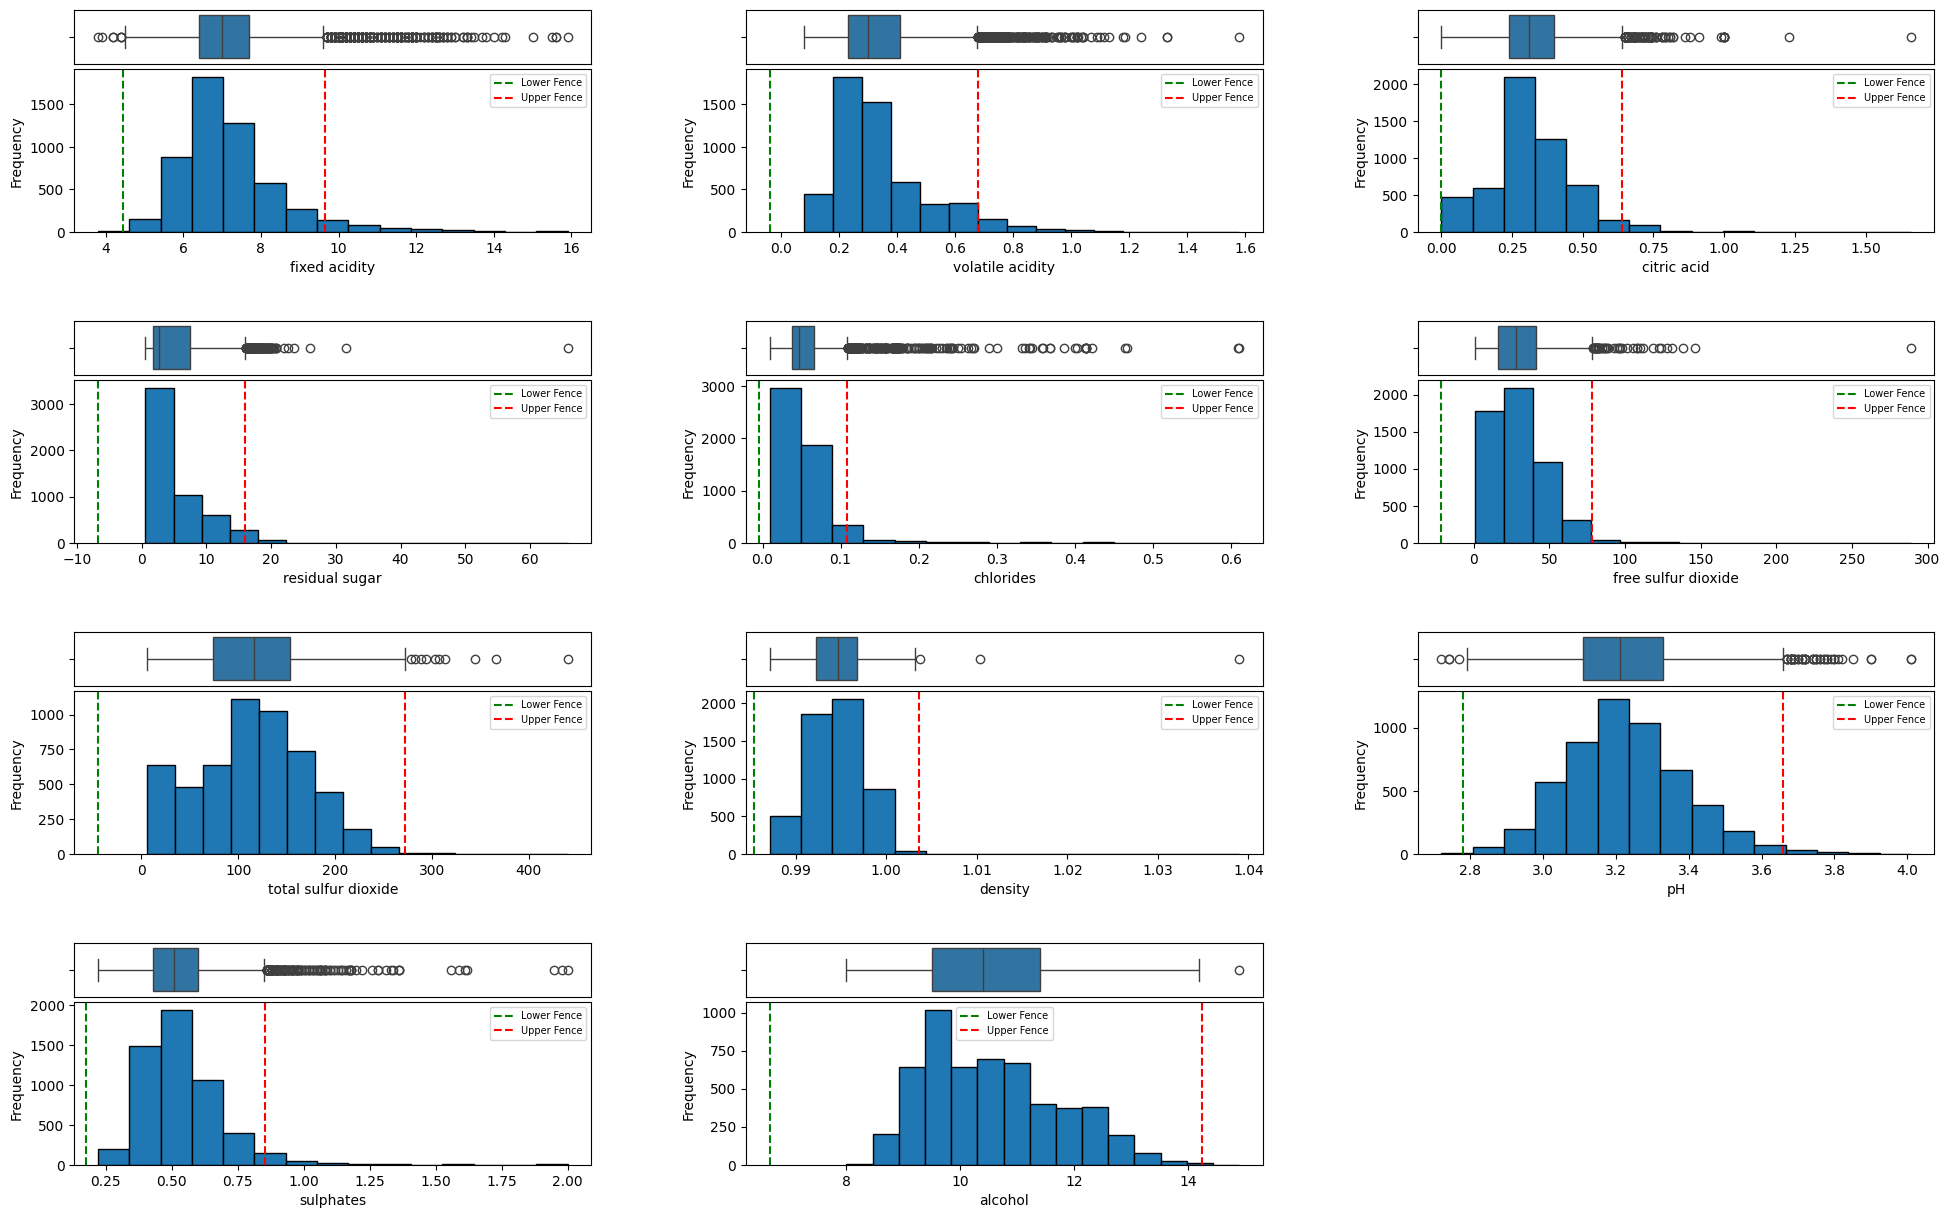

In [414]:
def plot_outliers(df):
    # Set the number of rows and columns
    rows = 4
    cols = 3

    # Set the figure size and add a grid spec for the subplots
    fig = plt.figure(figsize=(24, 15))
    grid_spec = fig.add_gridspec(rows, cols, wspace=0.3, hspace=0.4)

    # Iterate over the features and add subplots
    for i, feature in enumerate(df.columns):
        # Calculate the row and column for the subplot
        row = i // cols
        col = i % cols

        # Add a 2-row sub GridSpec for each cell
        sub_gs = grid_spec[row, col].subgridspec(2, 1, height_ratios=[1, 3], hspace=0.05)

        # Add a boxplot and a histogram for each feature using the sub GridSpec
        ax_box = fig.add_subplot(sub_gs[0])
        ax_hist = fig.add_subplot(sub_gs[1], sharex=ax_box) # share the x-axis with the boxplot

  
        lower_inner_fence, upper_inner_fence = compute_fences(df, feature) # compute the fences
        
        # Add a boxplot
        sns.boxplot(x=df[feature], ax=ax_box)
        ax_box.set(xlabel='')    # remove the x-axis label
        ax_box.tick_params(bottom=False, labelbottom=False) # remove the x-axis tick labels

        ax_hist.hist(df[feature], bins=15, edgecolor="black") # add a histogram
        ax_hist.set_xlabel(feature, fontsize=10) # set the x-axis label
        ax_hist.set_ylabel("Frequency", fontsize=10) # set the y-axis label

        # Add fence lines
        ax_hist.axvline(lower_inner_fence, color='green', linestyle='--', label='Lower Fence')
        ax_hist.axvline(upper_inner_fence, color='red', linestyle='--', label='Upper Fence')
        ax_hist.legend(fontsize=7 )

    plt.show()

plot_outliers(df[df.columns[0:-2]])

`Observation`
* **"alcohol"** was the only feature having negligible outliers
* Only **"pH"** appeared to be normally distributed among all the features
* Most of the features were high **right/positively** skewed
* Except **"density"** and **"alcohol"**, all the features showed several outliers.

In [415]:
def detect_outliers(df, features):
    outlier_indices = [] # store the indices of the outliers

    # Iterate over each feature
    for feature in features:
        lower_inner_fence, upper_inner_fence = compute_fences(df, feature) # compute the lower and upper inner fences

        # find outliers for all less than lower and greater than upper inner fences
        outliers = df[(df[feature] < lower_inner_fence) | (df[feature] > upper_inner_fence)]  
        outlier_indices.extend(outliers.index) # add the indices of the outliers to the list

    # count the number of outliers for each index
    indices_count = {i: outlier_indices.count(i) for i in set(outlier_indices)}

    # keep only the indices that have more than 2 outliers
    outlier_indices = [i for i, v in indices_count.items() if v > 2]
    
    return outlier_indices

outliers = detect_outliers(df, df.columns[:-2]) # detect the outliers
df.iloc[outliers] # show outliers for each feature

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
87,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5,red
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,6,red
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,4,red
191,6.4,0.370,0.25,1.9,0.074,21.0,49.0,0.99740,3.57,0.62,9.8,6,red
297,7.1,0.630,0.06,2.0,0.083,8.0,29.0,0.99855,3.67,0.73,9.6,5,red
323,10.3,0.590,0.42,2.8,0.090,35.0,73.0,0.99900,3.28,0.70,9.5,6,red
5307,7.7,0.350,0.46,11.8,0.088,61.0,183.0,0.99786,2.86,0.47,9.0,5,white
372,9.1,0.280,0.48,1.8,0.067,26.0,46.0,0.99670,3.32,1.04,10.6,6,red
384,7.7,0.510,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,5,red
397,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,6,red


In response to the significant proportion of outliers identified by the 1.5xIQR rule in outlier detection process as shown above, the Winsorization method was applied to constrain these extreme observations to a specified statistical boundary. This approach was strategically chosen over outlier removal to mitigate the skewing effect of outliers on feature distributions while crucially preserving the entire sample size for a more robust modeling phase.

In [416]:
!pip3 -q install feature_engine

In [417]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(
    capping_method='iqr', # cap values at the 1st and 3rd quartile
    tail='both', # cap both tails
    fold=1.5, # multiply the IQR by 1.5
    variables= df.columns[0:-2].to_list() # features to be winsorized
)

df = winsorizer.fit_transform(df) # apply winsorization to the dataframe

outliers = detect_outliers(df, df.columns[:-2])
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 0


## 2.4 Initial Data Exploration  <a class="anchor"></a>
During this stage, address data questions using querying, data visualization and reporting techniques. These may include:

- **Distribution** of key attributes (for example, the target attribute of a prediction task)
- **Relationships** between pairs or small numbers of attributes
- Results of **simple aggregations**
- **Properties** of significant sub-populations
- **Simple** statistical analyses

These analyses may contribute to or refine the data description and quality aspects of your report, and feed into other data preparation steps needed for further analysis. 

- **Data exploration component of your report** - Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. Include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

### 2.4.1 Distributions  <a class="anchor"></a>

In [418]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [419]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);

In [420]:
# col = 'account_risk_band'
# Histogram & Results
# hist_chart(df, col)
# count_values_table(df.account_risk_band)

### 2.4.2 Correlations  <a class="anchor"></a>
Can we derive any correlation from this data-set. Pairplot chart gives us correlations, distributions and regression path
Correlogram are awesome for exploratory analysis. It allows to quickly observe the relationship between every variable of your matrix. 
It is easy to do it with seaborn: just call the pairplot function

Pairplot documentation is found here: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [421]:
#Seaborn allows to make a correlogram or correlation matrix really easily. 
#sns.pairplot(df.dropna().drop(['x'], axis=1), hue='y', kind ='reg')

#plt.show()


In [422]:
#df_agg = df.drop(['x'], axis=1).groupby(['y']).sum()
#df_agg = df.groupby(['y']).sum()

# 3. Stage Three - Data Preparation <a class="anchor"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

## 3.1 Select Your Data <a class="anchor"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your machine learning goal, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

Rationale for inclusion/exclusion - List the data to be included/excluded and the reasons for these decisions.

In [423]:
X_train_regr = df.drop(['date_maint', 'account_open_date'], axis = 1)
X_train = df.drop(['target', 'date_maint', 'account_open_date'], axis = 1)
X_test = test.drop(['date_maint', 'account_open_date'], axis = 1)

KeyError: "['date_maint', 'account_open_date'] not found in axis"

## 3.2 Clean The Data <a class="anchor"></a>
This task involves raising the data quality to the level required by the analysis techniques that you've selected. This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

# 4. Stage Four - Modelling <a class="anchor"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using e.g.Linear Regression 


## 4.1. Modelling technique <a class="anchor"></a>
Document the actual modelling technique that is to be used.

Import Models in your code below:

## 4.2. Modelling assumptions <a class="anchor"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.


## 4.3. Build Model <a class="anchor"></a>
Run the modelling tool on the prepared dataset to create your model.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

**Model** - This is the actual model produced by the modelling tool, not a report on the model.

**Model description** - Describe the resulting model, report on the interpretation of the model and document any difficulties encountered with their meanings.

## 4.4. Assess Model <a class="anchor"></a>
Interpret the models according to your knowledge, your prediction success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically to discuss the machine learning results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most ML projects a single technique is applied more than once and results are generated with several different techniques. 

**Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

**Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model. Document all such revisions and assessments.

# 5. Stage 5 - Evaluate  <a class="anchor"></a>
Previous steps deal with the accuracy and generality of the model. During this step you should assesses the degree to which the model meets your business objectives and seek to determine if there is some business reason why this model is deficient. 

Assessment of machine learning results - Summarise assessment results in terms of business success criteria, including a final statement regarding whether the project meets the initial business objectives.
Approved models - After assessing models with respect to business success criteria, the generated models that meet the selected criteria become the approved models. For this initial assessment, you are only required to consider one model.

# 6. Stage 6 - Deploy  <a class="anchor"></a>

In the deployment stage you would determine a strategy for their deployment and document here together with ongoing monitoring and maintenance of your model. This is particularly important as a predictive machine learning model significantly impacts business operations. For the purposes of this assessment we will use this section to conclude the report. The previous steps should contain your code and narrative text inserted at the relevant sections. Here, you should look at lessons learnt. This includes the things that went right, what went wrong, what you did well and areas for improvement. Additionally, summarise any other expereinces during the project.   

